This example notebook uses the averaging functions found ins the diff_classifier msd module to find average msd profiles over input msd datasets using precision-weighted averaging. Precision is the inverse of the standard squared error. This increases the contribution of videos that have many particles and more homogeneous datasets to the final calculated MSD.

In [1]:
import numpy as np
import diff_classifier.aws as aws
import diff_classifier.msd as msd

In [5]:
folder = 'Gel_Studies/09_19_18_NP_concentration' #Folder in AWS S3 containing files to be analyzed
bucket = 'ccurtis.data'
#experiment = 'test' #Used for naming purposes. Should exclude XY and well information

#vids = 2
to_track = []
frames = 651
fps = 100.02
umppx = 0.07

vids = 10
concs = ['1', 'pt5', 'pt1', 'pt05']
for conc in concs:
    for num in range(1, vids+1):
        #to_track.append('100x_0_4_1_2_gel_{}_bulk_vid_{}'.format(vis, num))
        to_track.append('{}uL_XY{}'.format(conc, '%02d' % num))

In [6]:
to_track

['1uL_XY01',
 '1uL_XY02',
 '1uL_XY03',
 '1uL_XY04',
 '1uL_XY05',
 '1uL_XY06',
 '1uL_XY07',
 '1uL_XY08',
 '1uL_XY09',
 '1uL_XY10',
 'pt5uL_XY01',
 'pt5uL_XY02',
 'pt5uL_XY03',
 'pt5uL_XY04',
 'pt5uL_XY05',
 'pt5uL_XY06',
 'pt5uL_XY07',
 'pt5uL_XY08',
 'pt5uL_XY09',
 'pt5uL_XY10',
 'pt1uL_XY01',
 'pt1uL_XY02',
 'pt1uL_XY03',
 'pt1uL_XY04',
 'pt1uL_XY05',
 'pt1uL_XY06',
 'pt1uL_XY07',
 'pt1uL_XY08',
 'pt1uL_XY09',
 'pt1uL_XY10',
 'pt05uL_XY01',
 'pt05uL_XY02',
 'pt05uL_XY03',
 'pt05uL_XY04',
 'pt05uL_XY05',
 'pt05uL_XY06',
 'pt05uL_XY07',
 'pt05uL_XY08',
 'pt05uL_XY09',
 'pt05uL_XY10']

In [7]:
geomean = {}
gSEM = {}
for sample_name in to_track:
    # Users can toggle between using pre-calculated geomean files and calculating new values by commenting out the relevant
    # lines of code within the for loop.
    #aws.download_s3('{}/geomean_{}.csv'.format(folder, sample_name), 'geomean_{}.csv'.format(sample_name), bucket_name=bucket)
    #aws.download_s3('{}/geoSEM_{}.csv'.format(folder, sample_name), 'geoSEM_{}.csv'.format(sample_name), bucket_name=bucket)
    #geomean[sample_name] = np.genfromtxt('geomean_{}.csv'.format(sample_name))
    #gSEM[sample_name] = np.genfromtxt('geoSEM_{}.csv'.format(sample_name))
    
    aws.download_s3('{}/msd_{}.csv'.format(folder, sample_name), 'msd_{}.csv'.format(sample_name), bucket_name=bucket)
    geomean[sample_name], gSEM[sample_name] = msd.geomean_msdisp(sample_name, umppx=umppx, fps=fps,
                                                             remote_folder=folder, bucket=bucket)
    print('Done with {}'.format(sample_name))

Done with 1uL_XY01
Done with 1uL_XY02
Done with 1uL_XY03
Done with 1uL_XY04
Done with 1uL_XY05
Done with 1uL_XY06
Done with 1uL_XY07
Done with 1uL_XY08
Done with 1uL_XY09
Done with 1uL_XY10
Done with pt5uL_XY01
Done with pt5uL_XY02
Done with pt5uL_XY03
Done with pt5uL_XY04
Done with pt5uL_XY05
Done with pt5uL_XY06
Done with pt5uL_XY07
Done with pt5uL_XY08
Done with pt5uL_XY09
Done with pt5uL_XY10
Done with pt1uL_XY01
Done with pt1uL_XY02
Done with pt1uL_XY03
Done with pt1uL_XY04
Done with pt1uL_XY05
Done with pt1uL_XY06
Done with pt1uL_XY07
Done with pt1uL_XY08
Done with pt1uL_XY09
Done with pt1uL_XY10
Done with pt05uL_XY01
Done with pt05uL_XY02
Done with pt05uL_XY03
Done with pt05uL_XY04
Done with pt05uL_XY05
Done with pt05uL_XY06
Done with pt05uL_XY07
Done with pt05uL_XY08
Done with pt05uL_XY09
Done with pt05uL_XY10


In [8]:
for conc in concs:
    to_avg = []
    for sample in to_track:
        if conc in sample:
            to_avg.append(sample)
    
    weights, wh1 = msd.precision_weight(to_avg, gSEM)
    geodata = msd.precision_averaging(to_avg, geomean, gSEM, weights,
                                      bucket=bucket, folder=folder, experiment=conc)

Note that in cases where two or more averaging steps are needed (for instance, if the user takes 5 videos per well with a total of four wells), averaging steps can be performed consecutively. the msd.binning function is a helpful tool by defining bins over which to average for multi-step averaging.

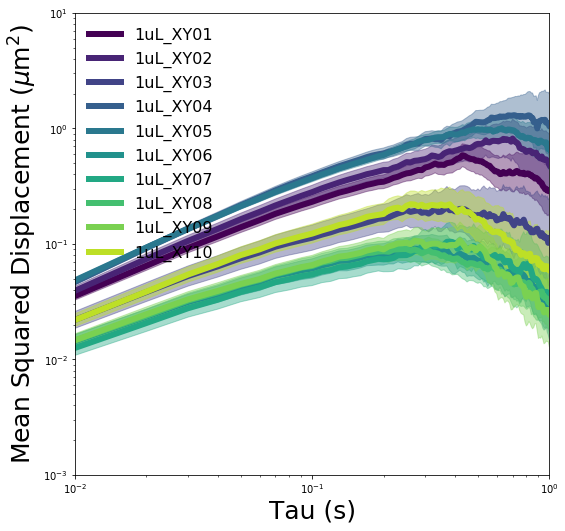

In [17]:
msd.plot_all_experiments(to_track[0:10], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

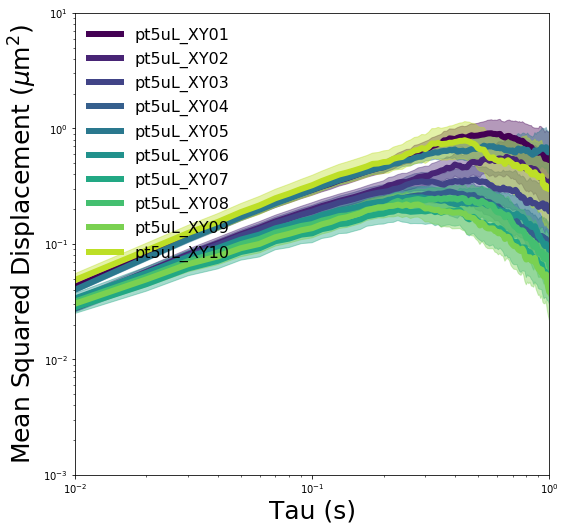

In [18]:
msd.plot_all_experiments(to_track[10:20], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

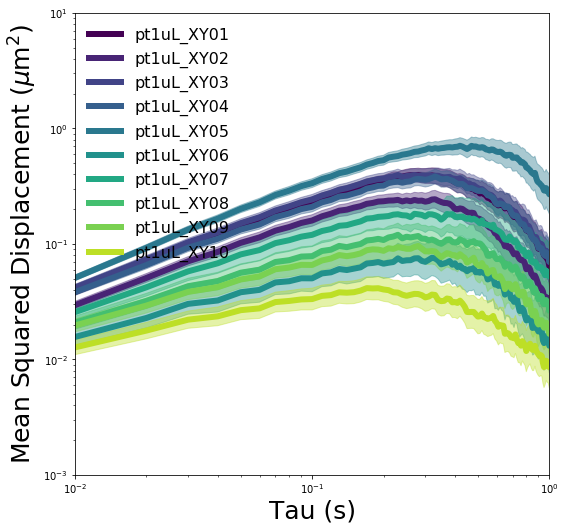

In [19]:
msd.plot_all_experiments(to_track[20:30], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

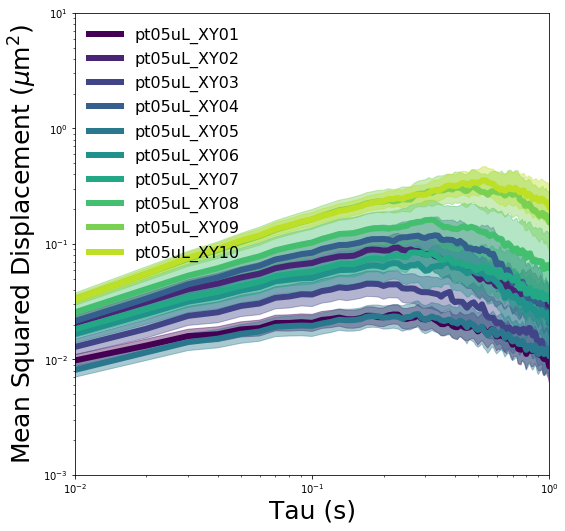

In [20]:
msd.plot_all_experiments(to_track[30:40], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

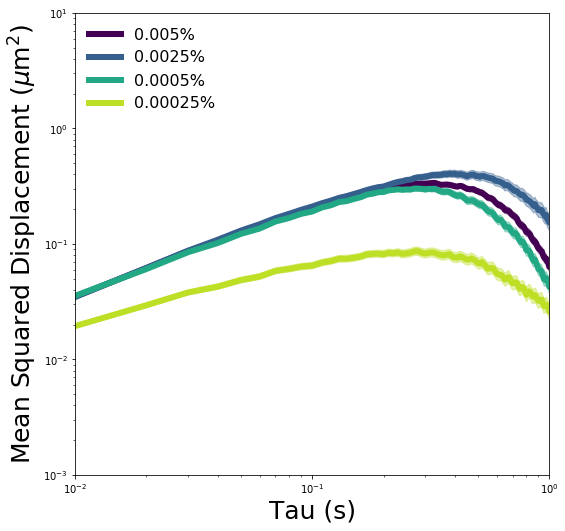

In [15]:
msd.plot_all_experiments(concs, yrange=(10**-3, 10**1), bucket=bucket, folder=folder, labels=['0.005%', '0.0025%', '0.0005%', '0.00025%'])

In [11]:
concs

['1', 'pt5', 'pt1', 'pt05']

In [ ]:
msd.plot_all_experiments(['2mM_5k_PEG', '2mM_5k_PEG_NH2', '2mM_PS_COOH', '2mM_PS_NH2'],
                         yrange=(10**-3, 10**1), bucket=bucket, folder=folder)